# linea del fractal

In [72]:
from matplotlib.collections import LineCollection
import matplotlib.transforms as mtransforms 


In [82]:
fig, ax = plt.subplots()
x, y = ([-8, -3, 0 , 3, 8], [0, 0, 4, 0, 0])
line = mlines.Line2D(x , y , lw=5., alpha=0.3, color='green')
ax.add_line(line)
ax.set_xlim(-10,10)
ax.set_ylim(-1,19)

transform = mtransforms.Affine2D().scale(5/16).translate(-6,0)#.rotate_deg(30) 
trans_data = transform + ax.transData 

#from copy import copy, deepcopy
#line2 = deepcopy(line)

line2 = mlines.Line2D(x , y , lw=5., alpha=0.3,color='red')
line2.set_transform(trans_data)
ax.add_line(line2)

plt.show()

# QuadMesh

In [2]:
def mandelbrot(x, y, mI):
    c=0
    z=np.complex(real=x,imag=y)
    c=z
    for i in range(mI):
        if z.real**2+z.imag**2 >= 4:
            break
        else:
            z = z*z + c
    return i, z

In [3]:
from matplotlib import cm, pyplot as plt
import numpy as np
mI=255

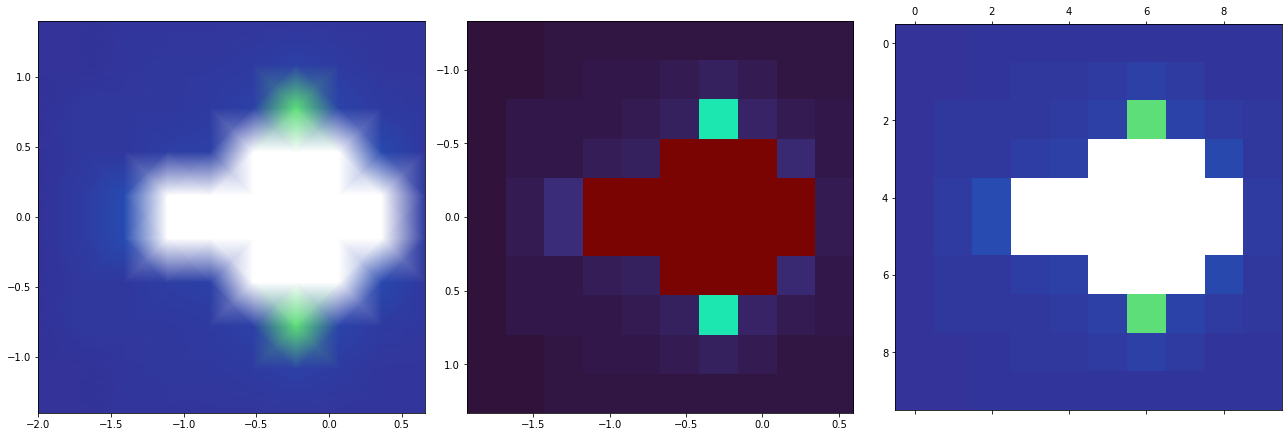

In [5]:
left, right = -2.0, 0.66
bottom, top = -1.4, 1.4
Rx, Ry = 250, 50
n=10
Rx, Ry = n, n

itNum = np.zeros((Rx,Ry))
Z     = np.zeros((Rx,Ry),dtype=np.complex_)
# Make data.
x = np.linspace(left, right, Rx) # 3
y = np.linspace(bottom, top, Ry)
#X,Y = np.meshgrid(x, y, sparse=True)
#wtf=np.zeros(shape=(Ry,Rx,2))
for i,vx in enumerate(x):
    for j,vy in enumerate(y):
        itNum[i][j], Z[i][j] = mandelbrot( vx, vy, mI)
        #wtf[j][i][0]=vx
        #wtf[j][i][1]=vy

hshift = 0.5 * np.abs(right - left)/(2*Rx)
ex_left, ex_right = left + hshift, right - hshift
vshift = 0.5 * np.abs(top - bottom)/(2*Ry)
ex_bottom, ex_top = bottom + vshift, top - vshift

fig, axs = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(18,6)

#cmap = cm.get_cmap(name='terrain', lut=None)

qm = axs[0].pcolormesh(x, y, itNum.transpose(), cmap=cm.terrain, shading='gouraud', antialiased=True)# auto
axes_image = axs[1].imshow( itNum.transpose(), cmap=cm.turbo, interpolation='none', aspect='auto', origin='lower',
                       extent=[ex_left, ex_right, ex_top, ex_bottom] )
axs[2].matshow( itNum.transpose(), cmap=cm.terrain)

fig.tight_layout()
plt.show()

In [ ]:
ro=np.empty_like(qm._coordinates)

In [ ]:
wtf.shape==ro.shape, np.all(qm._coordinates[:,:,:]==wtf[:,:,:])

In [ ]:
qm._coordinates[0,0,1]==bottom, qm._coordinates[0,0,0]==left, qm._coordinates[-1,0,1]==top, qm._coordinates[-1,0,0]==left,

In [ ]:
qm._coordinates[0,-1,1]==bottom, qm._coordinates[0,-1,0]==right, qm._coordinates[-1,-1,1]==top, qm._coordinates[-1,-1,0]==right,

In [ ]:
#matplotlib.image
axes_image.make_image( None, magnification=2.0, unsampled=False)

In [ ]:
from matplotlib.collections import QuadMesh
wtfqm=QuadMesh(meshWidth=Rx-1, meshHeight=Ry-1, coordinates=wtf)

wtfqm.add_callback(func) 
    Add a callback function that will be called whenever one of the Artist's properties changes.
    def func(artist: Artist) -> Any

In [ ]:
coordinates = np.asarray(np.meshgrid(x, y))# can't be meshgrid sparse=True

In [ ]:
jeje=QuadMesh(meshWidth=Rx-1, meshHeight=Ry-1, coordinates=coordinates)

# contours to polygons

In [ ]:
%matplotlib widget
from matplotlib import cm, pyplot as plt
import numpy as np

x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y
fig, axs = plt.subplots(2,4, frameon=False, sharex=True, sharey=True)

In [ ]:
# using CONTOUR lines collection (function)
c = axs[0,0].contour(h, levels=[10, 30, 50], cmap=cm.coolwarm)
s=c.collections[0].get_segments()[0]
axs[0,1].scatter(s[:,0],s[:,1], cmap=cm.coolwarm_r)

from matplotlib import cbook
ssli=cbook.simple_linear_interpolation(s,2)
axs[0,2].scatter(ssli[:,0],ssli[:,1])

smx,smy=cbook.pts_to_midstep(s[:,0],s[:,1])
axs[0,3].plot(smx,smy)

# using FILLED CONTOUR paths (polygon)
cf = axs[1,0].contourf(h, levels=[10, 30, 50], cmap=cm.coolwarm)

v=cf.collections[0].get_paths()[0].vertices
axs[1,1].scatter(v[:,0],v[:,1])

p=cf.collections[0].get_paths()[0]
pi=p.interpolated(2)
vi=pi.vertices
axs[1,2].scatter(vi[:,0],vi[:,1])

pi2=pi.interpolated(2)
vi2=pi2.vertices
axs[1,3].scatter(vi2[:,0],vi2[:,1])

In [ ]:
# vertices - from line collection
c.collections[0].get_segments()#[0]

In [ ]:
# vertices, walk pair - from path collection
cf.collections[0].get_paths()#[0]

# clip path

In [ ]:
from matplotlib import transforms as mtransforms, pyplot as plt

import numpy as np
#make_image
#pcolorfast 
#def test_imshow_clip():
# As originally reported by Gellule Xg <gellule.xg@free.fr>
# use former defaults to match existing baseline image
matplotlib.rcParams['image.interpolation'] = 'nearest'

# Create a NxN image
N = 5
(x, y) = np.indices((N, N))
x -= N//2
y -= N//2
r = np.sqrt(x**2+y**2-x*y)

In [ ]:
x,y,r

In [ ]:
# Create a contour plot at N/4 and extract both the clip path and transform
fig, (ax1,ax2) = plt.subplots(1,2, frameon=True, sharex=True, sharey=True)

c = ax1.contour(r, [N/4])

lc = c.collections[0]
clip_path = lc.get_paths()[0]
clip_transform = lc.get_transform()
clip_path, clip_transform

In [ ]:
ax2.scatter( lc.get_segments()[0][:,0], lc.get_segments()[0][:,1] )

clip_path = mtransforms.TransformedPath(clip_path, clip_transform)

# Plot the image clipped by the contour
ax1.imshow(r, clip_path=clip_path, origin='lower')

In [ ]:
from matplotlib import transforms as mtransforms, pyplot as plt

import numpy as np
#make_image
#pcolorfast 
#def test_imshow_clip():
# As originally reported by Gellule Xg <gellule.xg@free.fr>
# use former defaults to match existing baseline image
matplotlib.rcParams['image.interpolation'] = 'nearest'

# Create a NxN image
N = 100
(x, y) = np.indices((N, N))
x -= N//2
y -= N//2
r = np.sqrt(x**2+y**2-x*y)

# Create a contour plot at N/4 and extract both the clip path and transform
fig, ax = plt.subplots()

c = ax.contour(r, [N/4])
x = c.collections[0]
clip_path = x.get_paths()[0]
clip_transform = x.get_transform()

clip_path = mtransforms.TransformedPath(clip_path, clip_transform)

# Plot the image clipped by the contour
ax.imshow(r, clip_path=clip_path)

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection


def label(xy, text):
    y = xy[1] - 0.15  # shift y-value for label so that it's below the artist
    plt.text(xy[0], y, text, ha="center", family='sans-serif', size=14)


fig, ax = plt.subplots()
# create 3x3 grid to plot the artists
grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T

patches = []

# add a circle
circle = mpatches.Circle(grid[0], 0.1, ec="none")
patches.append(circle)
label(grid[0], "Circle")

# add a rectangle
rect = mpatches.Rectangle(grid[1] - [0.025, 0.05], 0.05, 0.1, ec="none")
patches.append(rect)
label(grid[1], "Rectangle")

# add a wedge
wedge = mpatches.Wedge(grid[2], 0.1, 30, 270, ec="none")
patches.append(wedge)
label(grid[2], "Wedge")

# add a Polygon
polygon = mpatches.RegularPolygon(grid[3], 5, 0.1)
patches.append(polygon)
label(grid[3], "Polygon")

# add an ellipse
ellipse = mpatches.Ellipse(grid[4], 0.2, 0.1)
patches.append(ellipse)
label(grid[4], "Ellipse")

# add an arrow
arrow = mpatches.Arrow(grid[5, 0] - 0.05, grid[5, 1] - 0.05, 0.1, 0.1,
                       width=0.1)
patches.append(arrow)
label(grid[5], "Arrow")

# add a path patch
Path = mpath.Path
path_data = [
    (Path.MOVETO, [0.018, -0.11]),
    (Path.CURVE4, [-0.031, -0.051]),
    (Path.CURVE4, [-0.115, 0.073]),
    (Path.CURVE4, [-0.03, 0.073]),
    (Path.LINETO, [-0.011, 0.039]),
    (Path.CURVE4, [0.043, 0.121]),
    (Path.CURVE4, [0.075, -0.005]),
    (Path.CURVE4, [0.035, -0.027]),
    (Path.CLOSEPOLY, [0.018, -0.11])]
codes, verts = zip(*path_data)
path = mpath.Path(verts + grid[6], codes)
patch = mpatches.PathPatch(path)
patches.append(patch)
label(grid[6], "PathPatch")

# add a fancy box
fancybox = mpatches.FancyBboxPatch(
    grid[7] - [0.025, 0.05], 0.05, 0.1,
    boxstyle=mpatches.BoxStyle("Round", pad=0.02))
patches.append(fancybox)
label(grid[7], "FancyBboxPatch")

# add a line
x, y = ([-0.06, 0.0, 0.1], [0.05, -0.05, 0.05])
line = mlines.Line2D(x + grid[8, 0], y + grid[8, 1], lw=5., alpha=0.3)
label(grid[8], "Line2D")

colors = np.linspace(0, 1, len(patches))
collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.3)
collection.set_array(colors)
ax.add_collection(collection)
ax.add_line(line)

plt.axis('equal')
plt.axis('off')
plt.tight_layout()

plt.show()

# add collections

In [ ]:
import matplotlib.pyplot as plt
from matplotdasdlib import collections, colors, transforms
import numpy as np

nverts = 50
npts = 100

# Make some spirals
r = np.arange(nverts)
theta = np.linspace(0, 2*np.pi, nverts)
xx = r * np.sin(theta)
yy = r * np.cos(theta)
spiral = np.column_stack([xx, yy])

# Fixing random state for reproducibility
rs = np.random.RandomState(19680801)

# Make some offsets
xyo = rs.randn(npts, 2)

# Make a list of colors cycling through the default series.
colors = [colors.to_rgba(c)
          for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.subplots_adjust(top=0.92, left=0.07, right=0.97,
                    hspace=0.3, wspace=0.3)


col = collections.LineCollection([spiral], offsets=xyo,
                                 transOffset=ax1.transData)
trans = fig.dpi_scale_trans + transforms.Affine2D().scale(1.0/72.0)
col.set_transform(trans)  # the points to pixels transform
# Note: the first argument to the collection initializer
# must be a list of sequences of (x, y) tuples; we have only
# one sequence, but we still have to put it in a list.
ax1.add_collection(col, autolim=True)
# autolim=True enables autoscaling.  For collections with
# offsets like this, it is neither efficient nor accurate,
# but it is good enough to generate a plot that you can use
# as a starting point.  If you know beforehand the range of
# x and y that you want to show, it is better to set them
# explicitly, leave out the autolim kwarg (or set it to False),
# and omit the 'ax1.autoscale_view()' call below.

# Make a transform for the line segments such that their size is
# given in points:
col.set_color(colors)

ax1.autoscale_view()  # See comment above, after ax1.add_collection.
ax1.set_title('LineCollection using offsets')


# The same data as above, but fill the curves.
col = collections.PolyCollection([spiral], offsets=xyo,
                                 transOffset=ax2.transData)
trans = transforms.Affine2D().scale(fig.dpi/72.0)
col.set_transform(trans)  # the points to pixels transform
ax2.add_collection(col, autolim=True)
col.set_color(colors)


ax2.autoscale_view()
ax2.set_title('PolyCollection using offsets')

# 7-sided regular polygons

col = collections.RegularPolyCollection(
    7, sizes=np.abs(xx) * 10.0, offsets=xyo, transOffset=ax3.transData)
trans = transforms.Affine2D().scale(fig.dpi / 72.0)
col.set_transform(trans)  # the points to pixels transform
ax3.add_collection(col, autolim=True)
col.set_color(colors)
ax3.autoscale_view()
ax3.set_title('RegularPolyCollection using offsets')


# Simulate a series of ocean current profiles, successively
# offset by 0.1 m/s so that they form what is sometimes called
# a "waterfall" plot or a "stagger" plot.

nverts = 60
ncurves = 20
offs = (0.1, 0.0)

yy = np.linspace(0, 2*np.pi, nverts)
ym = np.max(yy)
xx = (0.2 + (ym - yy) / ym) ** 2 * np.cos(yy - 0.4) * 0.5
segs = []
for i in range(ncurves):
    xxx = xx + 0.02*rs.randn(nverts)
    curve = np.column_stack([xxx, yy * 100])
    segs.append(curve)

col = collections.LineCollection(segs, offsets=offs)
ax4.add_collection(col, autolim=True)
col.set_color(colors)
ax4.autoscale_view()
ax4.set_title('Successive data offsets')
ax4.set_xlabel('Zonal velocity component (m/s)')
ax4.set_ylabel('Depth (m)')
# Reverse the y-axis so depth increases downward
ax4.set_ylim(ax4.get_ylim()[::-1])


plt.show()